In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
x, y, z = symbols('x y z')

# set ndigits to out
pd.set_option('display.float_format', lambda x: '%.5f' % x)

There is three restrictions for equation to solve by this method:

$$ \exists F''(x),\  F'(x) \neq 0,\ F'(x)\ \textrm{and}\ F''(x)\ \textrm{does not change sign in } [a, b]$$ 

Algorithm:

$$ x^{k+1}\ =\ x^{k}\ -\ \frac{F(x^k)}{F'(x^k)},\ k\ =\ 1,\ 2,\ 3,\ ...$$ 

In [121]:
def optimize(f_x, derivative_f, x, delta=0.0001):

    cnt = 0
    x_next = 0
    hist = [[] for i in range(3)]
    dx = derivative_f(f_x)
    
    while 1:
        x_next = x - f_x(x) / dx(x)
        x = x_next

        hist[0].append(cnt)
        hist[1].append(x)
        hist[2].append(f_x(x))

        cnt += 1
        if cnt > 2:
            if abs(hist[2][cnt - 2] - f_x(x)) < delta:
                break

    return hist

Define function and find its derivative:

In [15]:
def f_x(x):
    return x ** 3 - x ** 2 + x + 2
f_x(x)

x**3 - x**2 + x + 2

In [122]:
def derivative_f(f_x):
    return lambdify(x, diff(f_x(x), x))

We can define start aproximation by plot:

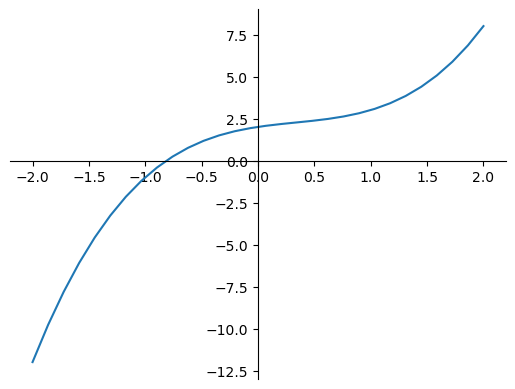

In [16]:
xa = np.linspace(-2, 2, 30)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xa, f_x(xa))
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

In [123]:
hist = optimize(f_x, derivative_f, 0.5, .001)

In [130]:
d_first = {'num iter': hist[0], 'x': hist[1], 'f(x)': hist[2]}
print(pd.DataFrame(data=d_first).to_string(index=False))

 num iter        x      f(x)
        0 -2.66667 -26.74074
        1 -1.70013  -7.50475
        2 -1.12601  -1.82157
        3 -0.86784  -0.27459
        4 -0.81287  -0.01072
        5 -0.81054  -0.00002
        6 -0.81054  -0.00000
